# Grip at The Sparks Foundation
## Task: 3 Exploratory Data Analysis - Retail
### By: Tushar Kumar
#### Dataset: SampleSuperstore.csv 



In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [39]:
df = pd.read_csv('SampleSuperstore.csv')

In [40]:
df.dropna()
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [6]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [7]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


# Correlation shows the strength of a relationship between two variables and is expressed numerically by the correlation coefficient.

In [17]:
df[['Sales','Quantity','Discount','Profit']].corr()

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200795,-0.028190,0.479064
Quantity,0.200795,1.000000,0.008623,0.066253
Discount,-0.028190,0.008623,1.000000,-0.219487
Profit,0.479064,0.066253,-0.219487,1.000000


<AxesSubplot:>

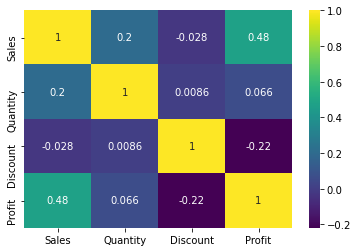

In [16]:
sns.heatmap(df[['Sales','Quantity','Discount','Profit']].corr(), cmap='viridis' , annot=True)

 From above heatmap we can say that 
 1. Profit Nad Sales Are Moderately correlated
 2. Profit and Discount are negatively correlated
 3. Quantity and sales are less correlated

#    
#    
#    

# Distribution Plots

C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


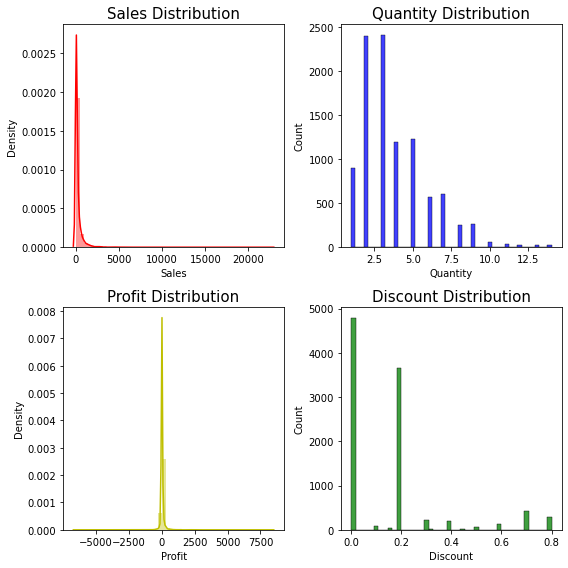

In [19]:
fid, axs = plt.subplots(ncols=2, nrows=2 , figsize=(8,8))
sns.distplot(df['Sales'],color='r',ax= axs[0][0])
sns.histplot(df['Quantity'],color='b',ax= axs[0][1])
sns.distplot(df['Profit'],color='y',ax= axs[1][0])
sns.histplot(df['Discount'],color='g',ax= axs[1][1])
axs[0][0].set_title('Sales Distribution', fontsize= 15)
axs[0][1].set_title('Quantity Distribution',fontsize=15)
axs[1][0].set_title('Profit Distribution', fontsize=15)
axs[1][1].set_title('Discount Distribution', fontsize=15)
plt.tight_layout()

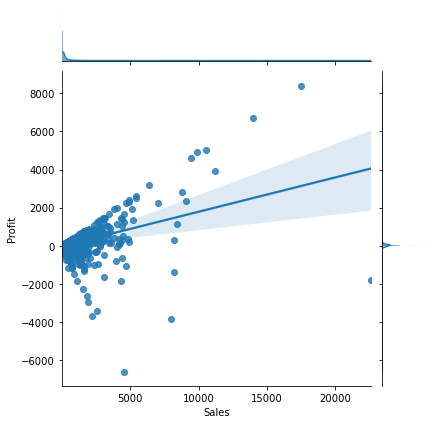

In [20]:
sns.jointplot(x='Sales',y='Profit',data=df,kind='reg')

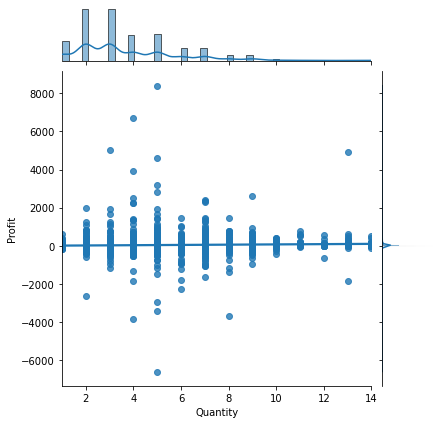

In [21]:
sns.jointplot(x='Quantity',y='Profit',data=df,kind='reg')

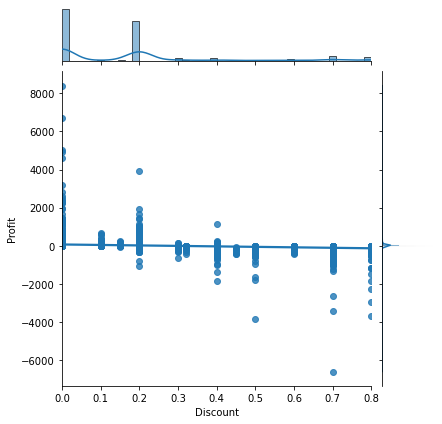

In [163]:
sns.jointplot(y='Profit',x='Discount',data=df,kind='reg')

#    
#    
#    

# Pairplot with hue as Category/Segment 

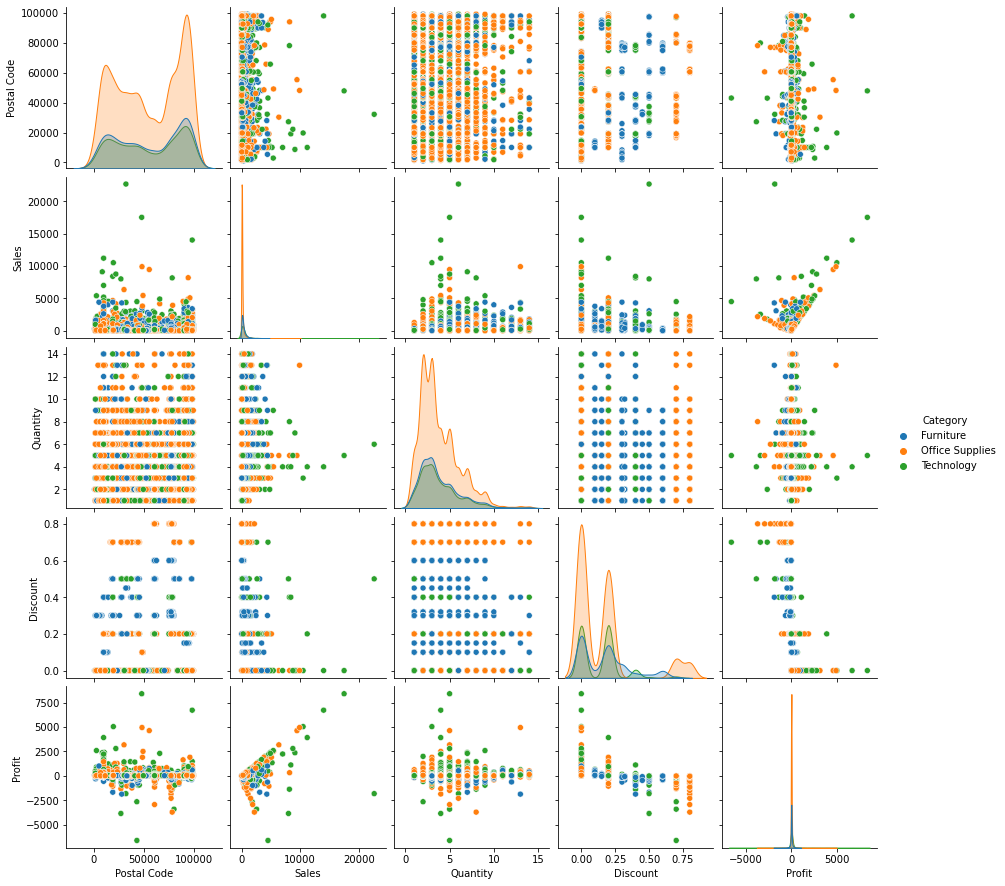

In [23]:
sns.pairplot(data=df, hue='Category')

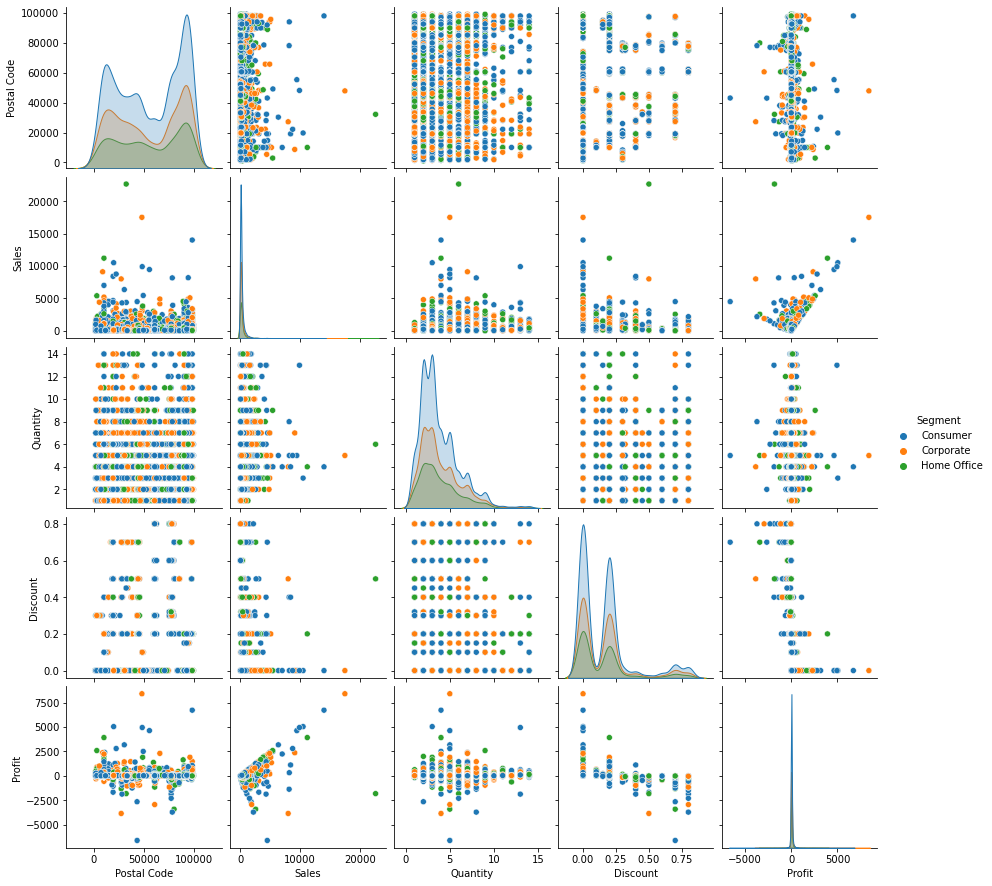

In [24]:
sns.pairplot(data=df, hue='Segment')

#    
#    
#    

# PROFIT and SALES ANALYSIS


# Analyzing Profits Category Wise

In [74]:
df['Category'].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

<AxesSubplot:xlabel='Category', ylabel='count'>

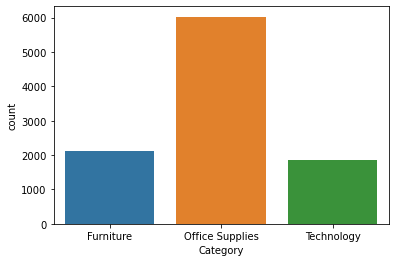

In [162]:
sns.countplot(x='Category',data=df)

In [75]:
#Sum Of Profits
df_Category_SumProfit = df.groupby('Category')['Profit'].sum()
df_Category_SumProfit

Category
Furniture           18451.2728
Office Supplies    122490.8008
Technology         145454.9481
Name: Profit, dtype: float64

In [76]:
#Mean Of Profits
df_Category_MeanProfit = df.groupby('Category')['Profit'].mean()
df_Category_MeanProfit

Category
Furniture           8.699327
Office Supplies    20.327050
Technology         78.752002
Name: Profit, dtype: float64

# Highest Mean Profit In Technology Category 

#    
#    
#    

# Analyzing profit based on Ship Modes

In [25]:
df['Ship Mode'].unique()

array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
      dtype=object)

<AxesSubplot:xlabel='Ship Mode', ylabel='count'>

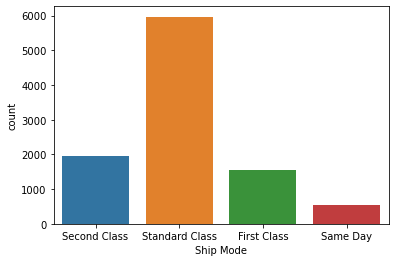

In [161]:
sns.countplot(x='Ship Mode',data=df)

In [62]:
#Sum Of Profit
df_Shipmode_SumProfit = df.groupby(['Ship Mode'])['Profit'].sum()
                                       
df_Shipmode_SumProfit

Ship Mode
First Class        48969.8399
Same Day           15891.7589
Second Class       57446.6354
Standard Class    164088.7875
Name: Profit, dtype: float64

In [63]:
#mean of Profit
df_Shipmode_MeanProfit = df.groupby(['Ship Mode'])['Profit'].mean()
                                       
df_Shipmode_MeanProfit

Ship Mode
First Class       31.839948
Same Day          29.266591
Second Class      29.535545
Standard Class    27.494770
Name: Profit, dtype: float64

# Not much difference here

#    
#    
#    

# Analyzing Profit Segment wise

In [141]:
df['Segment'].unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

<AxesSubplot:xlabel='Segment', ylabel='count'>

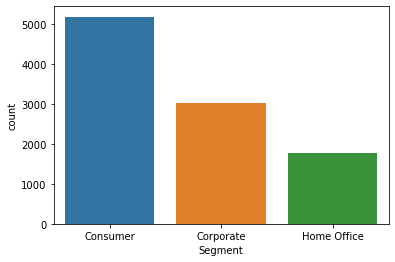

In [160]:
sns.countplot(x='Segment',data=df)

In [67]:
#Sum Of Profit
df_Segment_SumProfit = df.groupby('Segment')['Profit'].sum()
df_Segment_SumProfit

Segment
Consumer       134119.2092
Corporate       91979.1340
Home Office     60298.6785
Name: Profit, dtype: float64

In [68]:
#Mean of Profit
df_Segment_MeanProfit = df.groupby('Segment')['Profit'].mean()
df_Segment_MeanProfit

Segment
Consumer       25.836873
Corporate      30.456667
Home Office    33.818664
Name: Profit, dtype: float64

# Highest Average Profit In Home Office Segment

#    
#    
#    

# Analyzing Profits State wise

In [108]:
df_State = df['State'].unique()
df_State

array(['Kentucky', 'California', 'Florida', 'North Carolina',
       'Washington', 'Texas', 'Wisconsin', 'Utah', 'Nebraska',
       'Pennsylvania', 'Illinois', 'Minnesota', 'Michigan', 'Delaware',
       'Indiana', 'New York', 'Arizona', 'Virginia', 'Tennessee',
       'Alabama', 'South Carolina', 'Oregon', 'Colorado', 'Iowa', 'Ohio',
       'Missouri', 'Oklahoma', 'New Mexico', 'Louisiana', 'Connecticut',
       'New Jersey', 'Massachusetts', 'Georgia', 'Nevada', 'Rhode Island',
       'Mississippi', 'Arkansas', 'Montana', 'New Hampshire', 'Maryland',
       'District of Columbia', 'Kansas', 'Vermont', 'Maine',
       'South Dakota', 'Idaho', 'North Dakota', 'Wyoming',
       'West Virginia'], dtype=object)

### Sum Of Profit

In [92]:
df_State_SumProfit = df.groupby('State')['Profit'].sum().sort_values()
df_State_SumProfit

State
Texas                  -25729.3563
Ohio                   -16971.3766
Pennsylvania           -15559.9603
Illinois               -12607.8870
North Carolina          -7490.9122
Colorado                -6527.8579
Tennessee               -5341.6936
Arizona                 -3427.9246
Florida                 -3399.3017
Oregon                  -1190.4705
Wyoming                   100.1960
West Virginia             185.9216
North Dakota              230.1497
South Dakota              394.8283
Maine                     454.4862
Idaho                     826.7231
Kansas                    836.4435
District of Columbia     1059.5893
New Mexico               1157.1161
Iowa                     1183.8119
New Hampshire            1706.5028
South Carolina           1769.0566
Montana                  1833.3285
Nebraska                 2037.0942
Louisiana                2196.1023
Vermont                  2244.9783
Utah                     2546.5335
Mississippi              3172.9762
Nevada        

In [93]:
#Bottom 10
df_State_SumProfit_bottom10 = df.groupby('State')['Profit'].sum().sort_values().head(10)
df_State_SumProfit_bottom10

State
Texas            -25729.3563
Ohio             -16971.3766
Pennsylvania     -15559.9603
Illinois         -12607.8870
North Carolina    -7490.9122
Colorado          -6527.8579
Tennessee         -5341.6936
Arizona           -3427.9246
Florida           -3399.3017
Oregon            -1190.4705
Name: Profit, dtype: float64

In [94]:
#top 10
df_State_SumProfit_top10 = df.groupby('State')['Profit'].sum().sort_values(ascending=False).head(10)
df_State_SumProfit_top10

State
California    76381.3871
New York      74038.5486
Washington    33402.6517
Michigan      24463.1876
Virginia      18597.9504
Indiana       18382.9363
Georgia       16250.0433
Kentucky      11199.6966
Minnesota     10823.1874
Delaware       9977.3748
Name: Profit, dtype: float64

### Mean Of Profit

In [146]:
df_State_MeanProfit = df.groupby('State')['Profit'].mean().sort_values(ascending=False)
df_State_MeanProfit

State
Vermont                 204.088936
Rhode Island            130.100523
Indiana                 123.375411
Montana                 122.221900
Minnesota               121.608847
District of Columbia    105.958930
Delaware                103.930988
Wyoming                 100.196000
Missouri                 97.518341
Michigan                 95.934069
Alabama                  94.865989
Georgia                  88.315453
Nevada                   85.045279
Virginia                 83.026564
Kentucky                 80.573357
Wisconsin                76.380004
New Jersey               75.176260
Oklahoma                 73.544788
Maryland                 66.963608
Arkansas                 66.811452
Washington               66.013146
New York                 65.637011
New Hampshire            63.203807
Mississippi              59.867475
Maine                    56.810775
Nebraska                 53.607742
Louisiana                52.288150
Massachusetts            50.262975
Utah          

In [96]:
#Bottom 10
df_State_MeanProfit_bottom10 = df.groupby('State')['Profit'].mean().sort_values().head(10)
df_State_MeanProfit_bottom10

State
Ohio             -36.186304
Colorado         -35.867351
North Carolina   -30.083985
Tennessee        -29.189583
Pennsylvania     -26.507598
Texas            -26.121174
Illinois         -25.625787
Arizona          -15.303235
Oregon            -9.600569
Florida           -8.875461
Name: Profit, dtype: float64

In [97]:
#top 10
df_State_MeanProfit_top10 = df.groupby('State')['Profit'].mean().sort_values(ascending=False).head(10)
df_State_MeanProfit_top10

State
Vermont                 204.088936
Rhode Island            130.100523
Indiana                 123.375411
Montana                 122.221900
Minnesota               121.608847
District of Columbia    105.958930
Delaware                103.930988
Wyoming                 100.196000
Missouri                 97.518341
Michigan                 95.934069
Name: Profit, dtype: float64

Text(0.5, 1.0, 'Mean Profit State wise/Top 30')

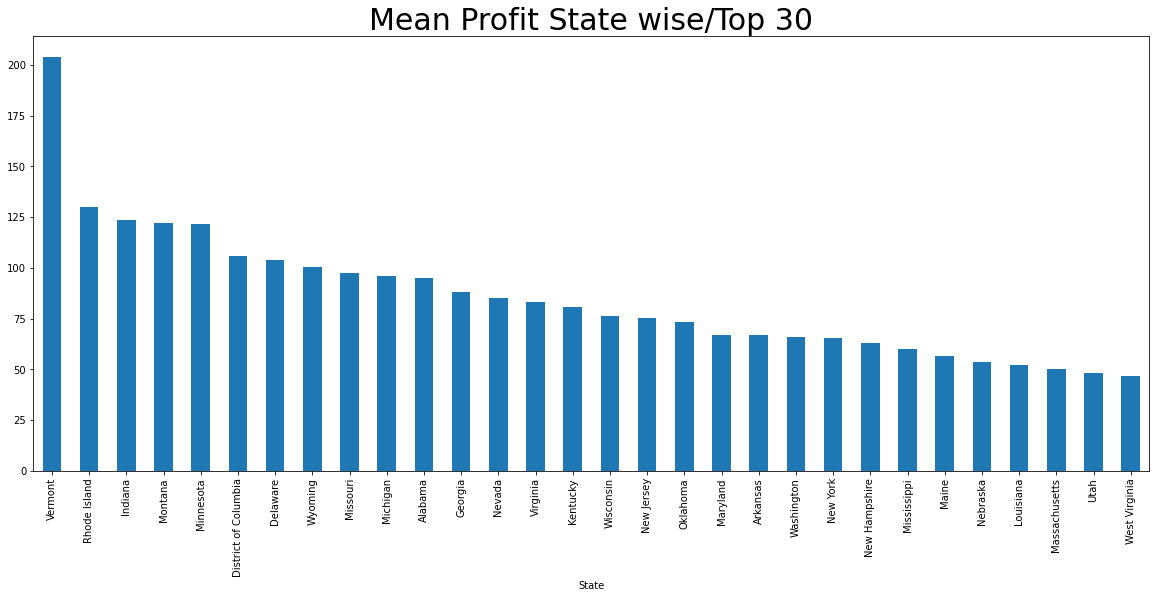

In [190]:
df_State_MeanProfit.head(30).plot(kind='bar',figsize=(20,8))
plt.title('Mean Profit State wise/Top 30',fontsize=30)

Text(0.5, 1.0, 'Mean PROFIT State wise/Bottom 30')

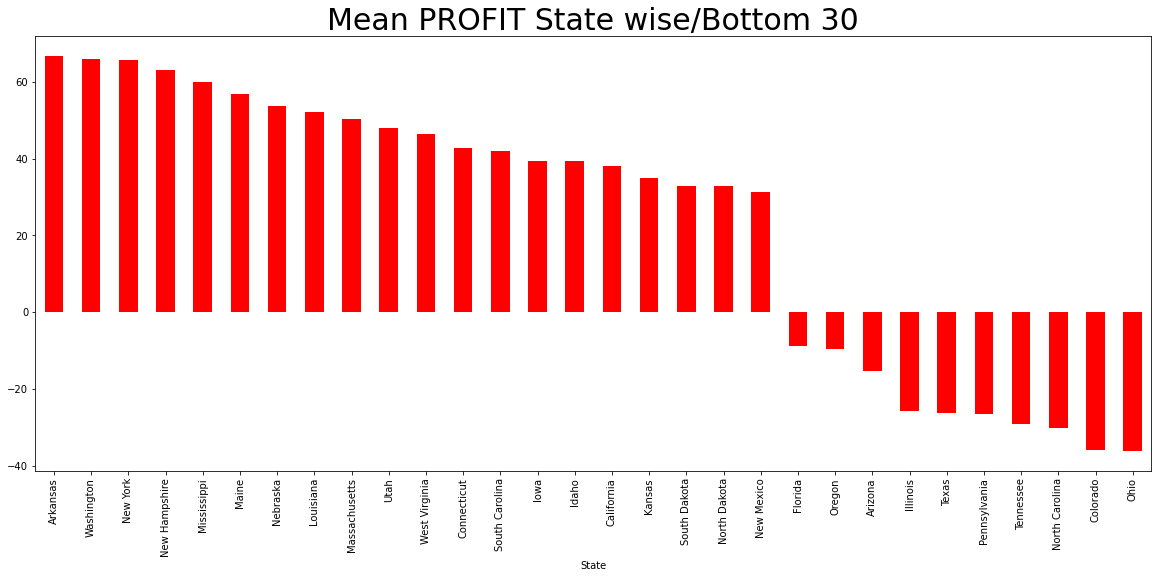

In [189]:
df_State_MeanProfit.tail(30).plot(kind='bar',figsize=(20,8),color='r')
plt.title('Mean PROFIT State wise/Bottom 30',fontsize=30)

# Most Profitable State: Vermont
# Least Profitable State: Ohio

#   
#   
#   

# Analysing Sales State Wise

In [182]:
df_State_SumSales = df.groupby('State')['Sales'].sum().sort_values(ascending=False)
df_State_SumSales

State
California              457687.6315
New York                310876.2710
Texas                   170188.0458
Washington              138641.2700
Pennsylvania            116511.9140
Florida                  89473.7080
Illinois                 80166.1010
Ohio                     78258.1360
Michigan                 76269.6140
Virginia                 70636.7200
North Carolina           55603.1640
Indiana                  53555.3600
Georgia                  49095.8400
Kentucky                 36591.7500
New Jersey               35764.3120
Arizona                  35282.0010
Wisconsin                32114.6100
Colorado                 32108.1180
Tennessee                30661.8730
Minnesota                29863.1500
Massachusetts            28634.4340
Delaware                 27451.0690
Maryland                 23705.5230
Rhode Island             22627.9560
Missouri                 22205.1500
Oklahoma                 19683.3900
Alabama                  19510.6400
Oregon                

In [170]:
#Bottom 10
df_State_SumSales_bottom10 = df.groupby('State')['Sales'].sum().sort_values().head(10)
df_State_SumSales_bottom10

State
North Dakota             919.910
West Virginia           1209.824
Maine                   1270.530
South Dakota            1315.560
Wyoming                 1603.136
District of Columbia    2865.020
Kansas                  2914.310
Idaho                   4382.486
Iowa                    4579.760
New Mexico              4783.522
Name: Sales, dtype: float64

In [171]:
#Top 10
df_State_SumSales_bottom10 = df.groupby('State')['Sales'].sum().sort_values(ascending=False).head(10)
df_State_SumSales_bottom10

State
California      457687.6315
New York        310876.2710
Texas           170188.0458
Washington      138641.2700
Pennsylvania    116511.9140
Florida          89473.7080
Illinois         80166.1010
Ohio             78258.1360
Michigan         76269.6140
Virginia         70636.7200
Name: Sales, dtype: float64

Text(0.5, 1.0, 'Sum Of SALES State wise/Top 30')

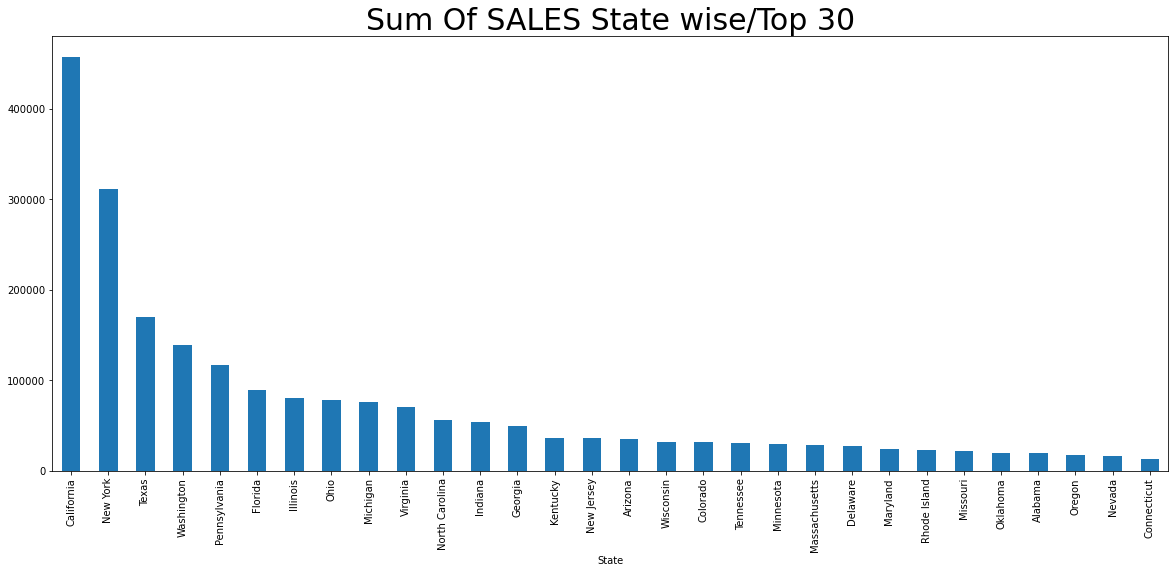

In [186]:
df_State_SumSales.head(30).plot(kind='bar',figsize=(20,8))
plt.title('Sum Of SALES State wise/Top 30',fontsize=30)

Text(0.5, 1.0, 'Sum Of SALES State wise/ Bottom 30')

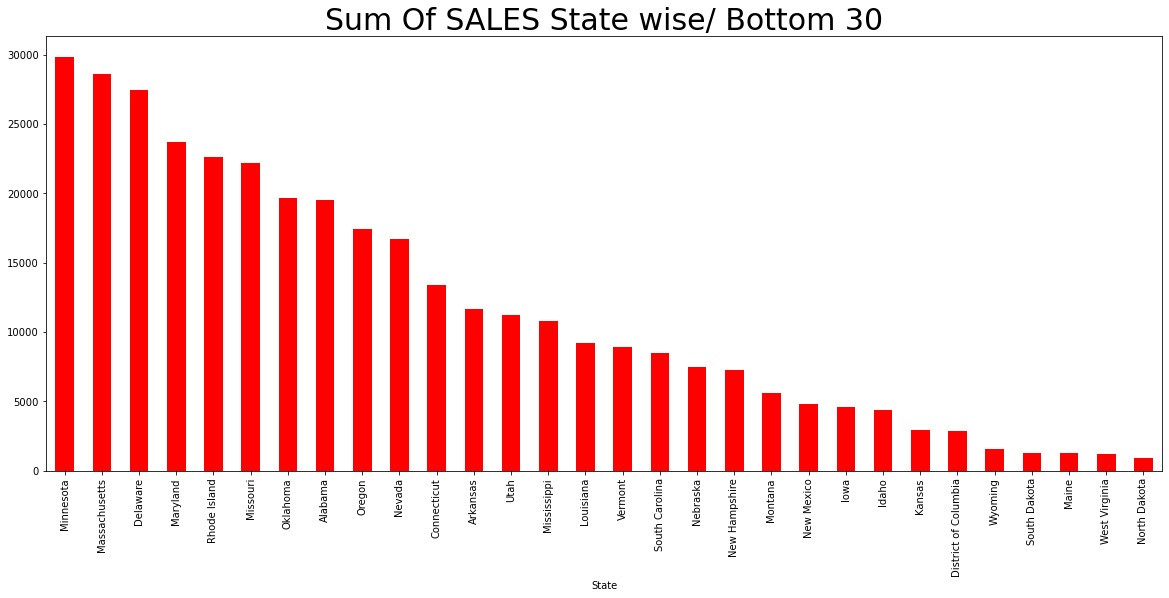

In [184]:
df_State_SumSales.tail(30).plot(kind='bar',figsize=(20,8),color='r')
plt.title('Sum Of SALES State wise/ Bottom 30',fontsize=30)

# Biggest Contributer in Sales : California     

# Lowest Contributer in Sales :  North Dakota

#      
#              

# Analyzing Profit City Wise

In [134]:
df_City = df['City'].unique
df_City

<bound method Series.unique of 0             Henderson
1             Henderson
2           Los Angeles
3       Fort Lauderdale
4       Fort Lauderdale
             ...       
9989              Miami
9990         Costa Mesa
9991         Costa Mesa
9992         Costa Mesa
9993        Westminster
Name: City, Length: 9994, dtype: object>

### Sum Profit

In [119]:
df_City_SumProfit = df.groupby('City')['Profit'].sum().sort_values()
df_City_SumProfit

City
Philadelphia    -13837.7674
Houston         -10153.5485
San Antonio      -7299.0502
Lancaster        -7239.0684
Chicago          -6654.5688
                    ...    
Detroit          13181.7908
San Francisco    17507.3854
Seattle          29156.0967
Los Angeles      30440.7579
New York City    62036.9837
Name: Profit, Length: 531, dtype: float64

In [120]:
#Bottom 10
df_City_SumProfit_bottom10 = df.groupby('City')['Profit'].sum().sort_values().head(10)
df_City_SumProfit_bottom10

City
Philadelphia   -13837.7674
Houston        -10153.5485
San Antonio     -7299.0502
Lancaster       -7239.0684
Chicago         -6654.5688
Burlington      -3622.8772
Dallas          -2846.5257
Phoenix         -2790.8832
Aurora          -2691.7386
Jacksonville    -2323.8350
Name: Profit, dtype: float64

In [136]:
#top 10
df_City_SumProfit_top10 = df.groupby('City')['Profit'].sum().sort_values(ascending=False).head(10)
df_City_SumProfit_top10

City
New York City    62036.9837
Los Angeles      30440.7579
Seattle          29156.0967
San Francisco    17507.3854
Detroit          13181.7908
Lafayette        10018.3876
Jackson           7581.6828
Atlanta           6993.6629
Minneapolis       6824.5846
San Diego         6377.1960
Name: Profit, dtype: float64

### Mean Profit

In [142]:
df_City_MeanProfit = df.groupby('City')['Profit'].mean().sort_values(ascending=False)
df_City_MeanProfit

City
Jamestown       642.885750
Independence    487.831500
Lafayette       323.173794
Minneapolis     296.721070
Appleton        277.383150
                   ...    
Lancaster      -157.371052
Round Rock     -169.061614
Oswego         -178.709200
Champaign      -182.352000
Bethlehem      -200.619160
Name: Profit, Length: 531, dtype: float64

In [139]:
#Bottom 10
df_City_MeanProfit_bottom10 = df.groupby('City')['Profit'].mean().sort_values().head(10)
df_City_MeanProfit_bottom10

City
Bethlehem     -200.619160
Champaign     -182.352000
Oswego        -178.709200
Round Rock    -169.061614
Lancaster     -157.371052
Clarksville   -150.764743
Medina        -149.227178
Burlington    -144.915088
San Antonio   -123.712715
Yuma          -116.497725
Name: Profit, dtype: float64

In [121]:
#top 10
df_City_MeanProfit_top10 = df.groupby('City')['Profit'].mean().sort_values(ascending=False).head(10)
df_City_MeanProfit_top10

City
Jamestown       642.885750
Independence    487.831500
Lafayette       323.173794
Minneapolis     296.721070
Appleton        277.383150
Morristown      262.603871
Burbank         254.844600
Lehi            225.831300
Beverly         218.306467
Warwick         212.759120
Name: Profit, dtype: float64

Text(0.5, 1.0, 'Mean Profit City wise/ Top 30')

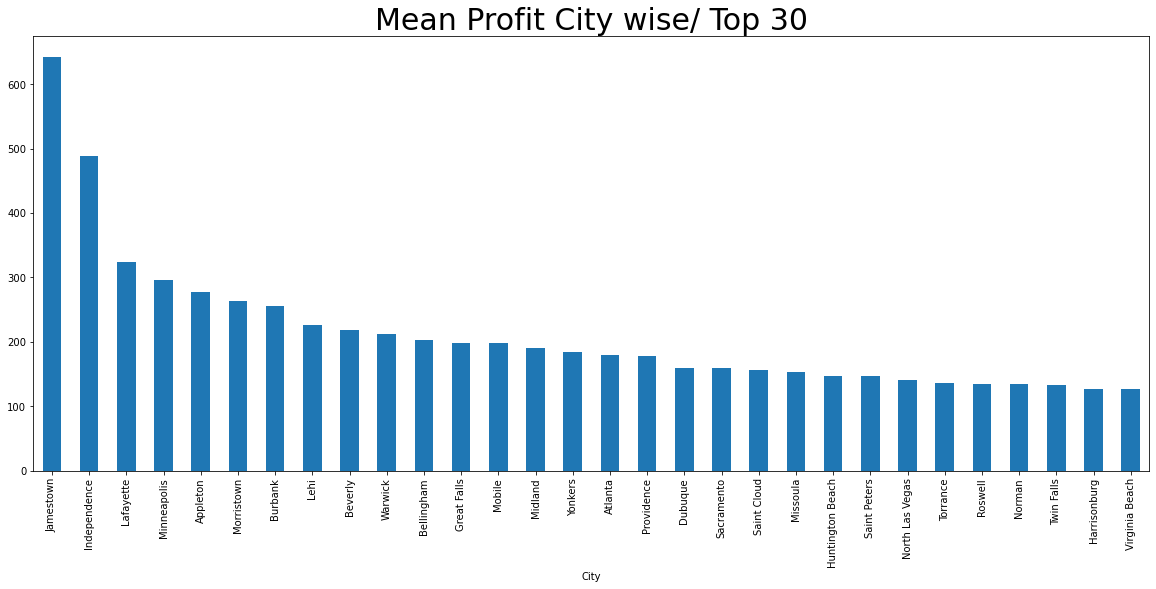

In [199]:
df_City_MeanProfit.head(30).plot(kind='bar',figsize=(20,8))
plt.title('Mean Profit City wise/ Top 30',fontsize=30)

Text(0.5, 1.0, 'Mean Profit City wise/ Bottom 30')

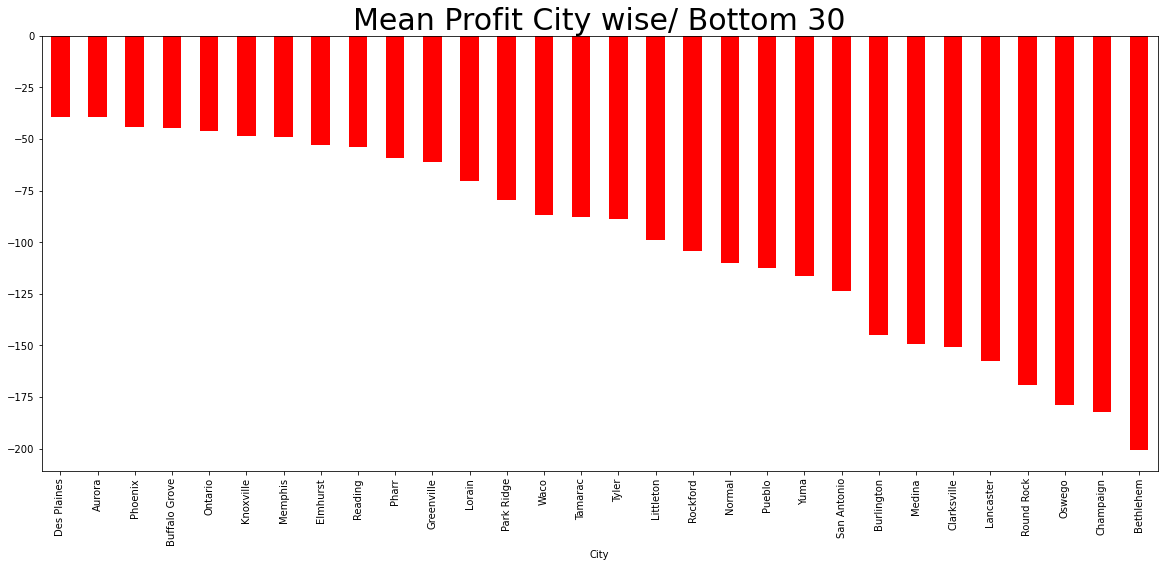

In [200]:
df_City_MeanProfit.tail(30).plot(kind='bar',figsize=(20,8),color='r')
plt.title('Mean Profit City wise/ Bottom 30',fontsize=30)

# Most Profitable City: Jamestown 
# Least Profitable City: Bethlehem

#    
#    
#    

# Analyzing Sales City Wise

In [194]:
df_City_SumSales = df.groupby('City')['Sales'].sum().sort_values(ascending=False)
df_City_SumSales

City
New York City    256368.161
Los Angeles      175851.341
Seattle          119540.742
San Francisco    112669.092
Philadelphia     109077.013
                    ...    
Ormond Beach          2.808
Pensacola             2.214
Jupiter               2.064
Elyria                1.824
Abilene               1.392
Name: Sales, Length: 531, dtype: float64

In [173]:
#Bottom 10
df_City_SumSales_bottom10 = df.groupby('City')['Sales'].sum().sort_values().head(10)
df_City_SumSales_bottom10

City
Abilene            1.392
Elyria             1.824
Jupiter            2.064
Pensacola          2.214
Ormond Beach       2.808
San Luis Obispo    3.620
Springdale         4.300
Layton             4.960
Keller             6.000
Missouri City      6.370
Name: Sales, dtype: float64

In [175]:
#Top 10
df_City_SumSales_top10 = df.groupby('City')['Sales'].sum().sort_values(ascending=False).head(10)
df_City_SumSales_top10

City
New York City    256368.1610
Los Angeles      175851.3410
Seattle          119540.7420
San Francisco    112669.0920
Philadelphia     109077.0130
Houston           64504.7604
Chicago           48539.5410
San Diego         47521.0290
Jacksonville      44713.1830
Springfield       43054.3420
Name: Sales, dtype: float64

Text(0.5, 1.0, 'Sum Of SALES City wise/ Top 30')

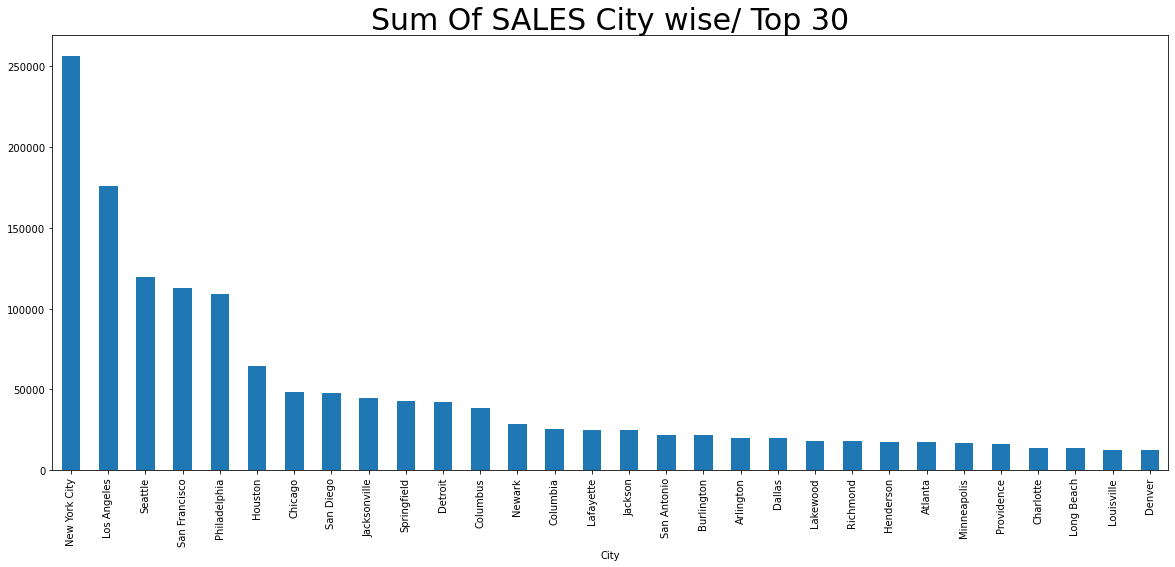

In [196]:
df_City_SumSales.head(30).plot(kind='bar',figsize=(20,8))
plt.title('Sum Of SALES City wise/ Top 30',fontsize=30)

Text(0.5, 1.0, 'Sum Of SALES City wise/ Bottom 30')

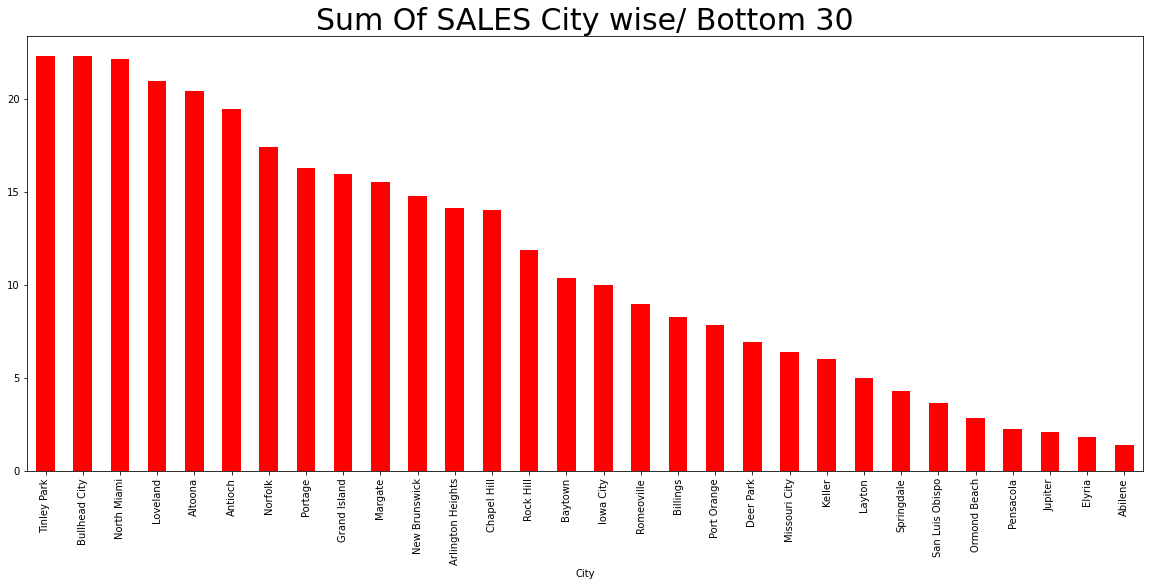

In [217]:
df_City_SumSales.tail(30).plot(kind='bar',figsize=(20,8),color='r')
plt.title('Sum Of SALES City wise/ Bottom 30',fontsize=30)

# Biggest Contributer in Sales : New York City 

# Lowest Contributer in Sales :  Abilene 

#  
#  
#  

# Analysing Profit Sub Category Wise

In [207]:
df_Subcategory = df['Sub-Category'].unique()
df_Subcategory

array(['Bookcases', 'Chairs', 'Labels', 'Tables', 'Storage',
       'Furnishings', 'Art', 'Phones', 'Binders', 'Appliances', 'Paper',
       'Accessories', 'Envelopes', 'Fasteners', 'Supplies', 'Machines',
       'Copiers'], dtype=object)

In [208]:
#Bottom 10
df_City_SumProfit_bottom10 = df.groupby('Sub-Category')['Profit'].sum().sort_values().head(10)
df_City_SumProfit_bottom10

Sub-Category
Tables        -17725.4811
Bookcases      -3472.5560
Supplies       -1189.0995
Fasteners        949.5182
Machines        3384.7569
Labels          5546.2540
Art             6527.7870
Envelopes       6964.1767
Furnishings    13059.1436
Appliances     18138.0054
Name: Profit, dtype: float64

In [212]:
#Top 10
df_City_SumProfit_top10 = df.groupby('Sub-Category')['Profit'].sum().sort_values(ascending=False).head(10)
df_City_SumProfit_top10

Sub-Category
Copiers        55617.8249
Phones         44515.7306
Accessories    41936.6357
Paper          34053.5693
Binders        30221.7633
Chairs         26590.1663
Storage        21278.8264
Appliances     18138.0054
Furnishings    13059.1436
Envelopes       6964.1767
Name: Profit, dtype: float64

# Biggest Contributer in Profit : Copiers

# Lowest Contributer in Profit :  Tables

#  
#  
#  

# Analysing Sales Sub Category Wise

In [211]:
#Bottom 10
df_City_SumSales_bottom10 = df.groupby('Sub-Category')['Sales'].sum().sort_values().head(10)
df_City_SumSales_bottom10

Sub-Category
Fasteners        3024.2800
Labels          12486.3120
Envelopes       16476.4020
Art             27118.7920
Supplies        46673.5380
Paper           78479.2060
Furnishings     91705.1640
Appliances     107532.1610
Bookcases      114879.9963
Copiers        149528.0300
Name: Sales, dtype: float64

In [214]:
#Top 10
df_City_SumSales_top10 = df.groupby('Sub-Category')['Sales'].sum().sort_values(ascending=False).head(10)
df_City_SumSales_top10

Sub-Category
Phones         330007.0540
Chairs         328449.1030
Storage        223843.6080
Tables         206965.5320
Binders        203412.7330
Machines       189238.6310
Accessories    167380.3180
Copiers        149528.0300
Bookcases      114879.9963
Appliances     107532.1610
Name: Sales, dtype: float64

# Biggest Contributer in Sales : Phones

# Lowest Contributer in Sales :  Fastners

#  
#  
#  

# Analysing Profit/Sales Region Wise


In [218]:
df_Subcategory = df['Region'].unique()
df_Subcategory

array(['South', 'West', 'Central', 'East'], dtype=object)

<AxesSubplot:xlabel='Region', ylabel='count'>

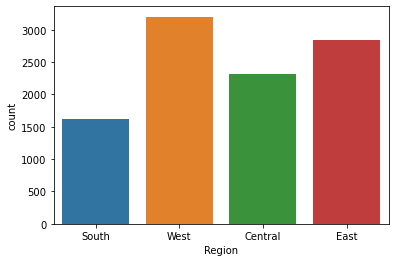

In [219]:
sns.countplot(x='Region',data=df)

In [221]:

df.groupby('Region')['Profit','Sales'].sum()

<ipython-input-221-24d46b6212a5>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('Region')['Profit','Sales'].sum()


,Profit,Sales
Region,,
Central,39706.3625,501239.8908
East,91522.7800,678781.2400
South,46749.4303,391721.9050
West,108418.4489,725457.8245


# Maximum Profit/Sales are in West Region